In [1]:
import numpy as np
from pandas import *
from ggplot import *
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

###Load in Data

In [2]:
df = read_csv('turnstile_data_master_with_weather.csv')
print(df.columns)

Index(['Unnamed: 0', 'UNIT', 'DATEn', 'TIMEn', 'Hour', 'DESCn',
       'ENTRIESn_hourly', 'EXITSn_hourly', 'maxpressurei', 'maxdewpti',
       'mindewpti', 'minpressurei', 'meandewpti', 'meanpressurei', 'fog',
       'rain', 'meanwindspdi', 'mintempi', 'meantempi', 'maxtempi', 'precipi',
       'thunder'],
      dtype='object')


##Gradient Descent

In [3]:
"""
In this question, you need to:
1) implement the compute_cost() and gradient_descent() procedures
2) Select features (in the predictions procedure) and make predictions.

"""

def normalize_features(df):
    """
    Normalize the features in the data set.
    """
    mu = df.mean()
    sigma = df.std()
    
    if (sigma == 0).any():
        raise Exception("One or more features had the same value for all samples, and thus could " + \
                         "not be normalized. Please do not include features with only a single value " + \
                         "in your model.")
    df_normalized = (df - df.mean()) / df.std()

    return df_normalized, mu, sigma

def compute_cost(features, values, theta):
    """
    Compute the cost function given a set of features / values, 
    and the values for our thetas.
    
    This can be the same code as the compute_cost function in the lesson #3 exercises,
    but feel free to implement your own.
    """
    
    m = len(values)
    sum_of_square_errors = np.square(np.dot(features, theta) - values).sum()
    cost = sum_of_square_errors / (2*m)

    return cost

def gradient_descent(features, values, theta, alpha, num_iterations):
    """
    Perform gradient descent given a data set with an arbitrary number of features.
    
    This can be the same gradient descent code as in the lesson #3 exercises,
    but feel free to implement your own.
    """
    
    m = len(values)
    cost_history = []

    for i in range(num_iterations):
        cost = compute_cost(features, values, theta)
        cost_history.append(cost)
        theta += (alpha/m)*((values-np.dot(features,theta))*features.T).sum(axis=1)
    return theta, Series(cost_history)

def predictions(dataframe):
    '''
    The NYC turnstile data is stored in a pandas dataframe called weather_turnstile.
    Using the information stored in the dataframe, let's predict the ridership of
    the NYC subway using linear regression with gradient descent.
    
    You can download the complete turnstile weather dataframe here:
    https://www.dropbox.com/s/meyki2wl9xfa7yk/turnstile_data_master_with_weather.csv    
    
    Your prediction should have a R^2 value of 0.40 or better.
    You need to experiment using various input features contained in the dataframe. 
    We recommend that you don't use the EXITSn_hourly feature as an input to the 
    linear model because we cannot use it as a predictor: we cannot use exits 
    counts as a way to predict entry counts. 
    
    Note: Due to the memory and CPU limitation of our Amazon EC2 instance, we will
    give you a random subet (~15%) of the data contained in 
    turnstile_data_master_with_weather.csv. You are encouraged to experiment with 
    this computer on your own computer, locally. 
    
    
    If you'd like to view a plot of your cost history, uncomment the call to 
    plot_cost_history below. The slowdown from plotting is significant, so if you 
    are timing out, the first thing to do is to comment out the plot command again.
    
    If you receive a "server has encountered an error" message, that means you are 
    hitting the 30-second limit that's placed on running your program. Try using a 
    smaller number for num_iterations if that's the case.
    
    If you are using your own algorithm/models, see if you can optimize your code so 
    that it runs faster.
    '''
    # Select Features (try different features!)
    features = dataframe[['rain', 'precipi', 'Hour', 'mintempi', 'maxtempi']]
    
    # Add UNIT to features using dummy variables
    dummy_units = get_dummies(dataframe['UNIT'], prefix='unit')
    features = features.join(dummy_units)
    
    # Values
    values = dataframe['ENTRIESn_hourly']
    m = len(values)

    features, mu, sigma = normalize_features(features)
    features['ones'] = np.ones(m) # Add a column of 1s (y intercept)
    
    # Convert features and values to numpy arrays
    features_array = np.array(features)
    values_array = np.array(values)

    # Set values for alpha, number of iterations.
    alpha = 0.1 # please feel free to change this value
    num_iterations = 40 # please feel free to change this value

    # Initialize theta, perform gradient descent
    theta_gradient_descent = np.zeros(len(features.columns))
    theta_gradient_descent, cost_history = gradient_descent(features_array, 
                                                            values_array, 
                                                            theta_gradient_descent, 
                                                            alpha, 
                                                            num_iterations)
    
    plot = None
    # -------------------------------------------------
    # Uncomment the next line to see your cost history
    # -------------------------------------------------
    plot = plot_cost_history(alpha, cost_history)
    # 
    # Please note, there is a possibility that plotting
    # this in addition to your calculation will exceed 
    # the 30 second limit on the compute servers.
    
    predictions = np.dot(features_array, theta_gradient_descent)
    return predictions, plot


def plot_cost_history(alpha, cost_history):
   """This function is for viewing the plot of your cost history.
   You can run it by uncommenting this

       plot_cost_history(alpha, cost_history) 

   call in predictions.
   
   If you want to run this locally, you should print the return value
   from this function.
   """
   cost_df = DataFrame({
      'Cost_History': cost_history,
      'Iteration': range(len(cost_history))
   })
   cost_df.plot()

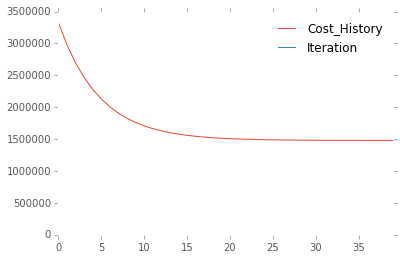

In [4]:
pred,plot = predictions(df)

In [5]:
def compute_r_squared(data, predictions):
    # Write a function that, given two input numpy arrays, 'data', and 'predictions,'
    # returns the coefficient of determination, R^2, for the model that produced 
    # predictions.
    # 
    # Numpy has a couple of functions -- np.mean() and np.sum() --
    # that you might find useful, but you don't have to use them.

    ss_residual = ((data-predictions)**2).sum()
    ss_total = ((data-data.mean())**2).sum()
    r_squared = 1 - ss_residual/ss_total

    return r_squared

0.458318071622


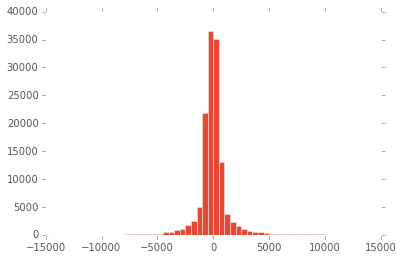

In [6]:
#rsquared
print(compute_r_squared(df['ENTRIESn_hourly'],pred))
#residuals
(df['ENTRIESn_hourly'] - pred).hist(bins=range(-15000,15000,500))

0.458318071622


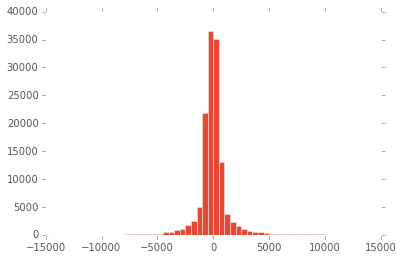

In [7]:
print(compute_r_squared(df['ENTRIESn_hourly'],pred))
(df['ENTRIESn_hourly'] - pred).hist(bins=range(-15000,15000,500))

## Plotting

In [23]:
def plot_weather_data(turnstile_weather):
    '''
    You are passed in a dataframe called turnstile_weather. 
    Use turnstile_weather along with ggplot to make a data visualization
    focused on the MTA and weather data we used in assignment #3.  
    You should feel free to implement something that we discussed in class 
    (e.g., scatterplots, line plots, or histograms) or attempt to implement
    something more advanced if you'd like.  

    Here are some suggestions for things to investigate and illustrate:
     * Ridership by time of day or day of week
     * How ridership varies based on Subway station (UNIT)
     * Which stations have more exits or entries at different times of day
       (You can use UNIT as a proxy for subway station.)

    If you'd like to learn more about ggplot and its capabilities, take
    a look at the documentation at:
    https://pypi.python.org/pypi/ggplot/
     
    You can check out:
    https://www.dropbox.com/s/meyki2wl9xfa7yk/turnstile_data_master_with_weather.csv
    
    To see all the columns and data points included in the turnstile_weather 
    dataframe. 
     
    However,due to the  limitation of our Amazon EC2 server, we are giving you a random
    subset, about 1/3 of the actual data in the turnstile_weather dataframe.
    '''

    plot = ggplot(turnstile_weather, aes(x='ENTRIESn_hourly', y='Hour'))+\
            geom_boxplot()+scale_x_log10()+ggtitle("Hourly Entries Throughout the Day")
    return plot


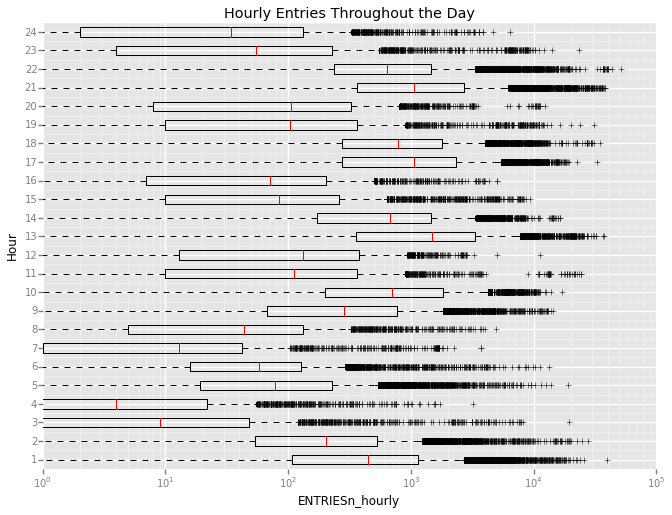

<ggplot: (-9223363283770001201)>

In [24]:
plot_weather_data(df)

In [99]:
def plot_weather_data(turnstile_weather):
    ''' 
    plot_weather_data is passed a dataframe called turnstile_weather. 
    Use turnstile_weather along with ggplot to make another data visualization
    focused on the MTA and weather data we used in Project 3.
    
    Make a type of visualization different than what you did in the previous exercise.
    Try to use the data in a different way (e.g., if you made a lineplot concerning 
    ridership and time of day in exercise #1, maybe look at weather and try to make a 
    histogram in this exercise). Or try to use multiple encodings in your graph if 
    you didn't in the previous exercise.
    
    You should feel free to implement something that we discussed in class 
    (e.g., scatterplots, line plots, or histograms) or attempt to implement
    something more advanced if you'd like.

    Here are some suggestions for things to investigate and illustrate:
     * Ridership by time-of-day or day-of-week
     * How ridership varies by subway station (UNIT)
     * Which stations have more exits or entries at different times of day
       (You can use UNIT as a proxy for subway station.)

    If you'd like to learn more about ggplot and its capabilities, take
    a look at the documentation at:
    https://pypi.python.org/pypi/ggplot/
     
    You can check out the link 
    https://www.dropbox.com/s/meyki2wl9xfa7yk/turnstile_data_master_with_weather.csv
    to see all the columns and data points included in the turnstile_weather 
    dataframe.
     
   However, due to the limitation of our Amazon EC2 server, we are giving you a random
    subset, about 1/3 of the actual data in the turnstile_weather dataframe.
    '''

    plot = ggplot(turnstile_weather, aes(y='rain', x='ENTRIESn_hourly'))+\
            geom_point(alpha = 0.005)+ggtitle("Hourly Entries Throughout the Day")+\
            scale_x_log10()+xlim(low=1)
    return plot


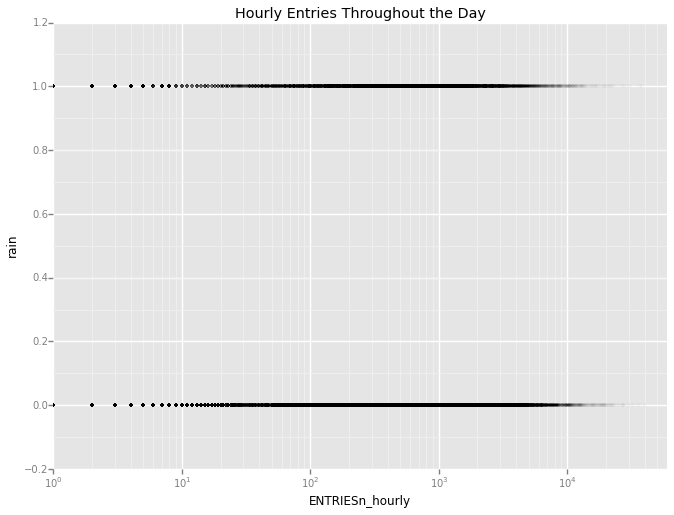

<ggplot: (-9223363283769906814)>

In [100]:
plot_weather_data(df)